# Modeling Phase - Compas Score
*Project Dataset, **Machine Learning** Course.* \
*Master Degree in Artificial Intelligence and Computer Science.* \
*a.y. 2021/2022*\
\
Group **404 Name Not Found**
+ Canonaco Martina [231874]
+ Gabriele Giada [235799]
+ Gena Davide [231873]
+ Morello Michele [223953]
___

### Load Python modules

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('ggplot')

## Binary Classification Task
#### Class Label: y = ['is_recid']
As primary goal we worked on the main dataset `dt_cleaned`to predict if a defendant becomes a recid on not.

In [2]:
dt_cleaned = pd.read_csv('dt_cleaned.csv', sep=',')
dt_cleaned

,age_cat,ethnicity,is_recid,score_text,sex
0,senior,Other,0,Low,Male
1,adult,African-American,1,Low,Male
2,young,African-American,1,Low,Male
3,young,African-American,0,High,Male
4,adult,Other,0,Low,Male
...,...,...,...,...,...
11022,senior,Other,0,Low,Male
11023,young,Caucasian,1,Medium,Male
11024,adult,Other,0,Low,Male
11025,adult,Caucasian,0,Low,Male


### Check Attribute types

In [3]:
dt_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age_cat     11027 non-null  object
 1   ethnicity   11027 non-null  object
 2   is_recid    11027 non-null  int64 
 3   score_text  11027 non-null  object
 4   sex         11027 non-null  object
dtypes: int64(1), object(4)
memory usage: 430.9+ KB


In [4]:
dt_cleaned['age_cat'] = dt_cleaned['age_cat'].astype('category')
dt_cleaned['ethnicity'] = dt_cleaned['ethnicity'].astype('category')
dt_cleaned['score_text'] = dt_cleaned['score_text'].astype('category')
dt_cleaned['sex'] = dt_cleaned['sex'].astype('category')
dt_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age_cat     11027 non-null  category
 1   ethnicity   11027 non-null  category
 2   is_recid    11027 non-null  int64   
 3   score_text  11027 non-null  category
 4   sex         11027 non-null  category
dtypes: category(4), int64(1)
memory usage: 129.9 KB


#### Add dummies instead of categorical attributes

In [5]:
number = preprocessing.LabelEncoder()
for attribute in dt_cleaned.columns:
    if dt_cleaned[attribute].dtype.name == "category":
        dt_cleaned[attribute] = number.fit_transform(dt_cleaned[attribute])

### Check if the dataset is balanced

In [6]:
dt_cleaned['is_recid'].value_counts()

0    7326
1    3701
Name: is_recid, dtype: int64

Resample Algorithm is needed.

### Split Dataset into Training Set and Test Set

In [7]:
X = dt_cleaned.drop('is_recid', axis=1)
y = dt_cleaned['is_recid']

seed = 121
test_size= 0.25
# 75% train set, 25% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

training_set = pd.concat([X_train, y_train], axis=1)
recid = training_set[training_set.is_recid==1]
not_recid = training_set[training_set.is_recid==0]

In [8]:
recid.shape

(2776, 5)

In [9]:
not_recid.shape

(5494, 5)

#### Perform Undersampling

In [10]:
from sklearn.utils import resample

In [11]:
not_recid_resampled = resample(not_recid, replace = True, n_samples=int(len(recid)), random_state=seed) #n_samples=int(len(recid)*1.3

dt_resampled = pd.concat([recid, not_recid_resampled])

X_train = dt_resampled.drop("is_recid", axis=1)
y_train = dt_resampled['is_recid']

In [12]:
dt_resampled.is_recid.value_counts()

1    2776
0    2776
Name: is_recid, dtype: int64

### Build different models and evaluate them using three metrics: *accuracy*, *recall* and *precision*

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

### Find the best parameters for the models

#### Decision Tree

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_leaf_nodes': [None, 5, 10, 15],
    'random_state': [None, 1, 2, 3, 4, 5]
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
#print(clf.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'random_state': [None, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

#### K Nearest Neighbors

In [15]:
knn_params = {
    'n_neighbors':  [1, 2, 3, 4, 5]
}

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

knn.fit(X_train, y_train)
#print(knn.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, verbose=1)

#### Random Forest

In [16]:
rf_params = {
    'random_state':  [10, 20, 30, 40, 50]
}

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

rf.fit(X_train, y_train)
#print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'random_state': [10, 20, 30, 40, 50]}, verbose=1)

#### Ada Boost

In [17]:
ab_params = {
    'random_state':  [110, 120, 130, 140, 150]
}

ab = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=ab_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

ab.fit(X_train, y_train)
#print(ab.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=5,
             param_grid={'random_state': [110, 120, 130, 140, 150]}, verbose=1)

#### Find the best model

In [18]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier(criterion="gini", splitter="random", random_state=5, max_depth=None, max_leaf_nodes=15)))
models.append(("KNeighborsClassifier", KNeighborsClassifier(2)))
models.append(("Random Forest", RandomForestClassifier(random_state=30)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=110)))

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(f'{name}:\n')
  print(f'Accuracy: {metrics.accuracy_score(y_test, predictions):.4f}')
  print(f'Recall: {metrics.recall_score(y_test, predictions):.4f}')
  print(f'Precision: {metrics.precision_score(y_test, predictions):.4f}')
  print(f'F-measure: {metrics.f1_score(y_test, predictions):.4f}\n')

Naive Bayes:

Accuracy: 0.5934
Recall: 0.6670
Precision: 0.4315
F-measure: 0.5240

DecisionTreeClassifier:

Accuracy: 0.6402
Recall: 0.5816
Precision: 0.4707
F-measure: 0.5203

KNeighborsClassifier:

Accuracy: 0.3442
Recall: 0.9903
Precision: 0.3374
F-measure: 0.5033

Random Forest:

Accuracy: 0.6380
Recall: 0.6151
Precision: 0.4699
F-measure: 0.5328

AdaBoost:

Accuracy: 0.6369
Recall: 0.5838
Precision: 0.4671
F-measure: 0.5190



### Evaluation - Random Forest

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.64


In [21]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Confusion Matrix

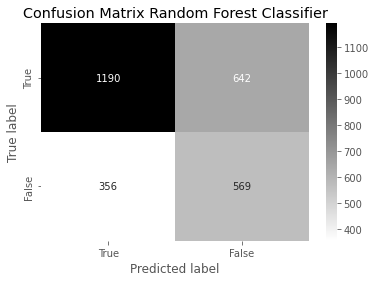

In [22]:
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary', title='Confusion Matrix Random Forest Classifier')

#### Classification Report

In [23]:
print("Classification Report - Random Forest Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1832
           1       0.47      0.62      0.53       925

    accuracy                           0.64      2757
   macro avg       0.62      0.63      0.62      2757
weighted avg       0.67      0.64      0.65      2757



#### ROC Curve

In [24]:
from sklearn.metrics import roc_curve, auc

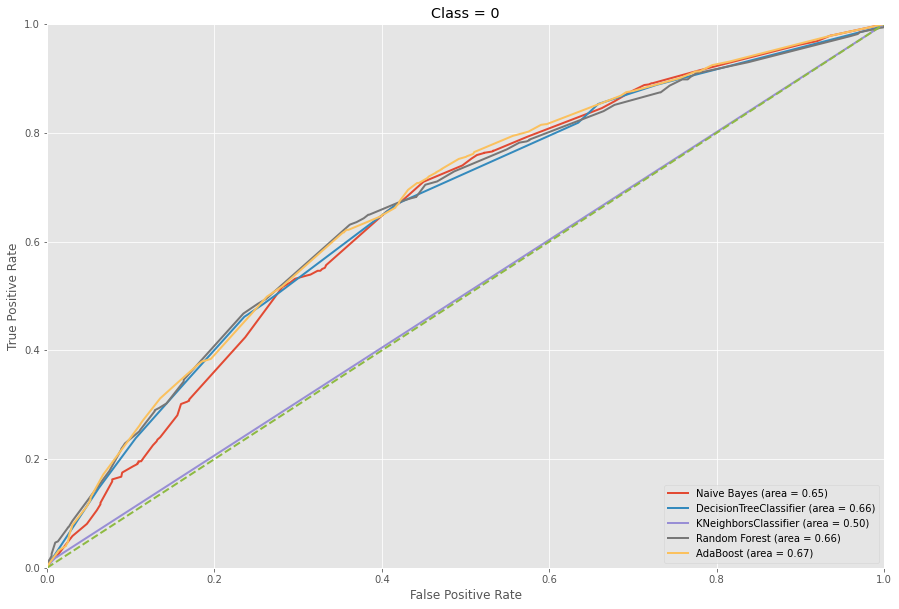

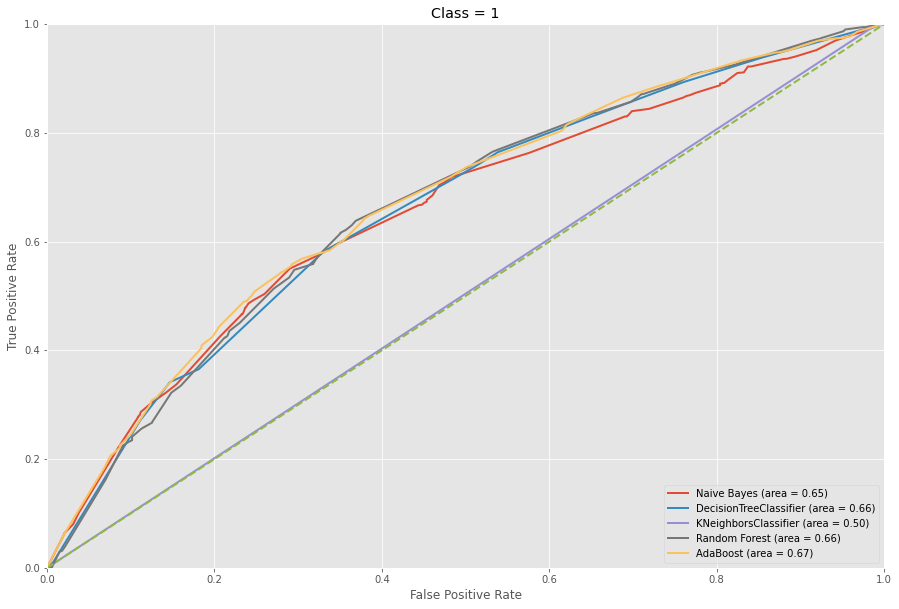

In [25]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['is_recid']))

probs = []

for _, model in models:
    model.fit(X_train, y_train)
    probs.append(model.predict_proba(X_test))
    
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure(figsize=(15,10))
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()

### Comparison between Random Forest and AdaBoost

In [26]:
model = AdaBoostClassifier(random_state=110)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.64


#### Classification Report - Ada Boost

In [27]:
print("Classification Report - Ada Boost Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1832
           1       0.47      0.58      0.52       925

    accuracy                           0.64      2757
   macro avg       0.61      0.62      0.61      2757
weighted avg       0.66      0.64      0.64      2757



We noticed that, although the AUC is higher for AdaBoost classifier, if we look at the F1-measure value, the best model for Classification equal to 1 (ndr recidivist) is Random Forest.

## Binary Classification Task
#### Class Label: y = ['is_violent_recid']
As secondary goal we worked on the dataset `dt_cleaned_v`to predict if a criminal becomes a violent recid on not.

In [28]:
dt_cleaned_v = pd.read_csv('dt_cleaned_v.csv', sep=',')
dt_cleaned_v

,age_cat,ethnicity,is_violent_recid,sex,v_score_text
0,adult,African-American,1,Male,Low
1,young,African-American,0,Male,Low
2,adult,Caucasian,0,Male,Low
3,young,Caucasian,1,Male,Medium
4,young,African-American,0,Male,Low
...,...,...,...,...,...
3696,young,Caucasian,0,Female,Low
3697,adult,Caucasian,0,Male,Low
3698,young,African-American,0,Male,Medium
3699,senior,African-American,0,Male,Low


### Check Attribute types

In [29]:
dt_cleaned_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_cat           3701 non-null   object
 1   ethnicity         3701 non-null   object
 2   is_violent_recid  3701 non-null   int64 
 3   sex               3701 non-null   object
 4   v_score_text      3701 non-null   object
dtypes: int64(1), object(4)
memory usage: 144.7+ KB


In [30]:
dt_cleaned_v['age_cat'] = dt_cleaned_v['age_cat'].astype('category')
dt_cleaned_v['ethnicity'] = dt_cleaned_v['ethnicity'].astype('category')
dt_cleaned_v['v_score_text'] = dt_cleaned_v['v_score_text'].astype('category')
dt_cleaned_v['sex'] = dt_cleaned_v['sex'].astype('category')
dt_cleaned_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age_cat           3701 non-null   category
 1   ethnicity         3701 non-null   category
 2   is_violent_recid  3701 non-null   int64   
 3   sex               3701 non-null   category
 4   v_score_text      3701 non-null   category
dtypes: category(4), int64(1)
memory usage: 44.1 KB


#### Add dummies instead of categorical attributes

In [31]:
number = preprocessing.LabelEncoder()
for attribute in dt_cleaned_v.columns:
    if dt_cleaned_v[attribute].dtype.name == "category":
        dt_cleaned_v[attribute] = number.fit_transform(dt_cleaned_v[attribute])

### Check if the dataset is balanced

In [32]:
dt_cleaned_v['is_violent_recid'].value_counts()

0    2819
1     882
Name: is_violent_recid, dtype: int64

Resample Algorithm is needed.

### Split Dataset into Training Set and Test Set

In [33]:
X = dt_cleaned_v.drop('is_violent_recid', axis=1)
y = dt_cleaned_v['is_violent_recid']

seed = 100
test_size= 0.25
# 75% train set, 25% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

training_set = pd.concat([X_train, y_train], axis=1)
violent_recid = training_set[training_set.is_violent_recid==1]
not_violent_recid = training_set[training_set.is_violent_recid==0]

In [34]:
violent_recid.shape

(656, 5)

In [35]:
not_violent_recid.shape

(2119, 5)

#### Perform Oversampling

In [36]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [37]:
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#### Build different models and evaluate them using three metrics: *accuracy*, *recall* and *precision*

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

### Find the best parameters for the models

#### Decision Tree

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':  [2, 4, 6, 8, 10],
    'max_leaf_nodes': [5, 10, 15],
    'random_state': [1, 2, 3, 4, 5]
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train_SMOTE, y_train_SMOTE)
#print(clf.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [5, 10, 15],
                         'random_state': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

#### K Nearest Neighbors

In [40]:
knn_params = {
    'n_neighbors':  [1, 2, 3, 4, 5]
}

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

knn.fit(X_train_SMOTE, y_train_SMOTE)
#print(knn.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, verbose=1)

#### Random Forest

In [41]:
rf_params = {
    'random_state':  [10, 20, 30, 40, 50]
}

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

rf.fit(X_train_SMOTE, y_train_SMOTE)
#print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'random_state': [10, 20, 30, 40, 50]}, verbose=1)

#### Ada Boost

In [42]:
ab_params = {
    'random_state':  [70, 100, 130, 140, 150]
}

ab = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=ab_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

ab.fit(X_train_SMOTE, y_train_SMOTE)
#print(ab.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=5,
             param_grid={'random_state': [70, 100, 130, 140, 150]}, verbose=1)

#### Find the best model

In [43]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier(criterion="gini", splitter="random", random_state=3, max_depth=4, max_leaf_nodes=10)))
models.append(("KNeighborsClassifier", KNeighborsClassifier(3)))
models.append(("Random Forest", RandomForestClassifier(random_state=10)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=70)))

for name, model in models:
  model.fit(X_train_SMOTE, y_train_SMOTE)
  predictions = model.predict(X_test)
  print(f'{name}:\n')
  print(f'Accuracy: {metrics.accuracy_score(y_test, predictions):.4f}')
  print(f'Recall: {metrics.recall_score(y_test, predictions):.4f}')
  print(f'Precision: {metrics.precision_score(y_test, predictions):.4f}')
  print(f'F-measure: {metrics.f1_score(y_test, predictions):.4f}\n')

Naive Bayes:

Accuracy: 0.5238
Recall: 0.5354
Precision: 0.2648
F-measure: 0.3543

DecisionTreeClassifier:

Accuracy: 0.5994
Recall: 0.3097
Precision: 0.2456
F-measure: 0.2740

KNeighborsClassifier:

Accuracy: 0.6706
Recall: 0.1327
Precision: 0.2158
F-measure: 0.1644

Random Forest:

Accuracy: 0.5756
Recall: 0.3850
Precision: 0.2551
F-measure: 0.3069

AdaBoost:

Accuracy: 0.6145
Recall: 0.3850
Precision: 0.2852
F-measure: 0.3277



### Evaluation - K-Nearest-Neighbors

In [44]:
model = AdaBoostClassifier(random_state=70)
model.fit(X_train_SMOTE,y_train_SMOTE)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.61


In [45]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Confusion Matrix

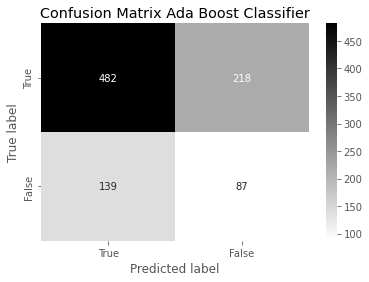

In [46]:
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary', title='Confusion Matrix Ada Boost Classifier')

#### Classification Report

In [47]:
print("Classification Report - Ada Boost Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       700
           1       0.29      0.38      0.33       226

    accuracy                           0.61       926
   macro avg       0.53      0.54      0.53       926
weighted avg       0.66      0.61      0.63       926



#### ROC Curve

In [48]:
from sklearn.metrics import roc_curve, auc

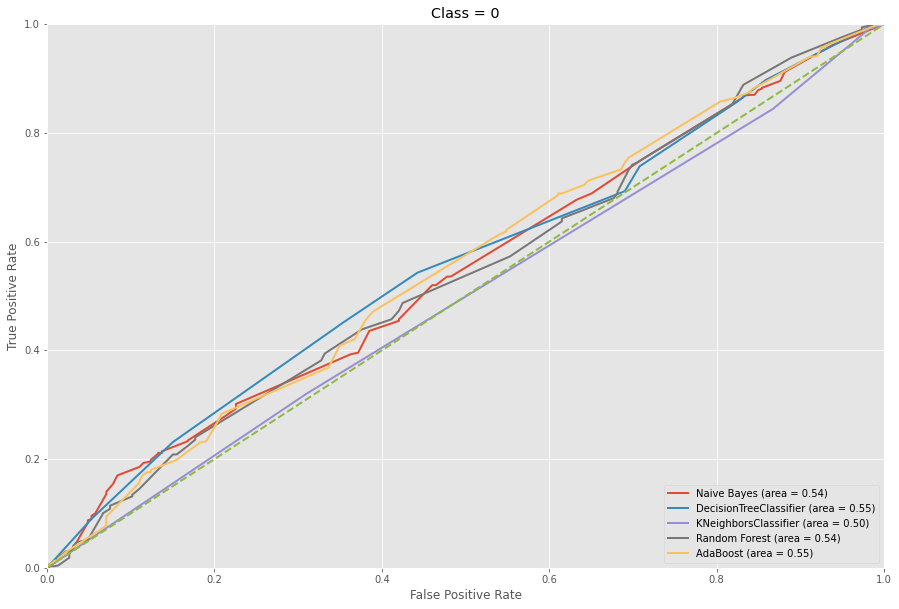

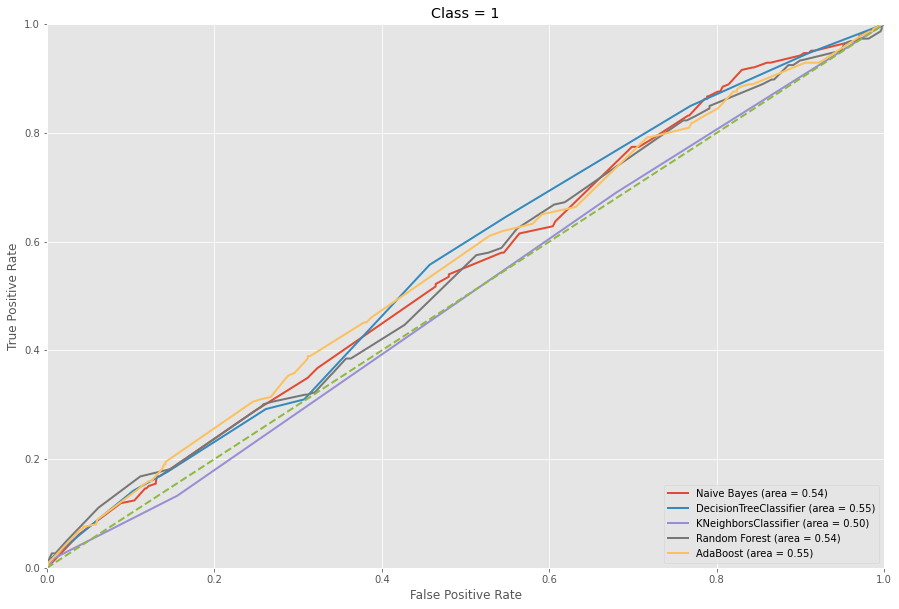

In [49]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['is_violent_recid']))

probs = []

for _, model in models:
    model.fit(X_train_SMOTE, y_train_SMOTE)
    probs.append(model.predict_proba(X_test))
    
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure(figsize=(15,10))
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()

#### Comparison between AdaBoost and Naive Bayes

In [50]:
model = GaussianNB()
model.fit(X_train_SMOTE,y_train_SMOTE)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.52


In [51]:
print("Classification Report - Naive Bayes Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       700
           1       0.26      0.54      0.35       226

    accuracy                           0.52       926
   macro avg       0.52      0.53      0.49       926
weighted avg       0.65      0.52      0.56       926



We noticed that, although the AUC is the same for the Ada Boost classifier and the Naive Bayes, if we look at the F1-measure value, the best model for Classification is the Ada Boost Classifier.

## Regression Model
#### Variable to predict: y = ['dates_diff_in_days']
As sub-goal we worked on the dataset `dt_date_r`to predict if it is a recid (`is_recid`=1) how many days pass from the first crime (attribute: `c_offense_date`) to the second (attribute: `r_offense_date`).

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('ggplot')

In [53]:
dt_date_r = pd.read_csv('dt_date_r.csv', sep=',')
print(dt_date_r)

     age_cat  dates_diff_in_days         ethnicity score_text     sex
0      adult                 160  African-American        Low    Male
1      young                  64  African-American        Low    Male
2      adult                  41         Caucasian     Medium    Male
3      young                 736         Caucasian        Low    Male
4      young                 128  African-American     Medium    Male
...      ...                 ...               ...        ...     ...
3088  senior                 286  African-American     Medium    Male
3089   young                 296         Caucasian        Low  Female
3090   young                   9  African-American        Low    Male
3091  senior                  30  African-American        Low    Male
3092   young                 513         Caucasian     Medium    Male

[3093 rows x 5 columns]


In [54]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [55]:
X = dt_date_r[['age_cat', 'ethnicity', 'score_text', 'sex']]
y = dt_date_r['dates_diff_in_days']

In [56]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age_cat_senior,age_cat_young,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other,score_text_Low,score_text_Medium,sex_Male
0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,1,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,1,1


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2319, 10)
(774, 10)
(2319,)
(774,)


In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#The intercept (often labeled the constant) is the expected mean value of Y when all X=0. 
#In a purely mathematical sense, this definition is correct

print(model.intercept_)

298.71399333484396


In [59]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_parameter

,coefficient
age_cat_senior,47.857954
age_cat_young,-17.088324
ethnicity_Asian,89.822557
ethnicity_Caucasian,-27.749853
ethnicity_Hispanic,-4.900140
ethnicity_Native American,-0.566236
ethnicity_Other,-6.337896
score_text_Low,26.047265
score_text_Medium,15.459139
sex_Male,-0.796888


c:\Users\giada\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dates_diff_in_days'>

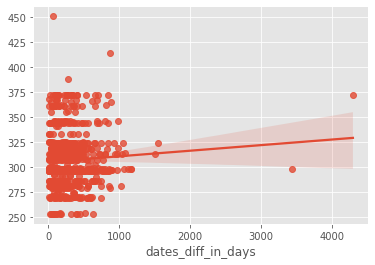

In [60]:
predictions = model.predict(X_test)
sn.regplot(y_test,predictions)

It is possible to see from the plot that there is not a linear correlation between the number of days and the other variables.

#### OLS Regression Results

In [61]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     dates_diff_in_days   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.747
Date:                Thu, 23 Jun 2022   Prob (F-statistic):             0.0653
Time:                        10:54:10   Log-Likelihood:                -16513.
No. Observations:                2319   AIC:                         3.305e+04
Df Residuals:                    2308   BIC:                         3.311e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Plot the residuals for each attribute

eval_env: 1


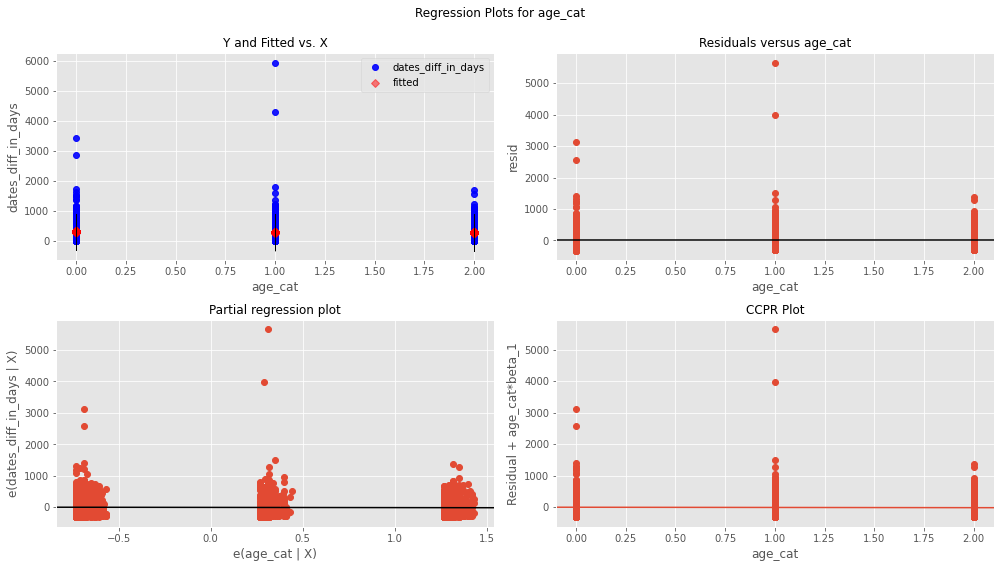

eval_env: 1


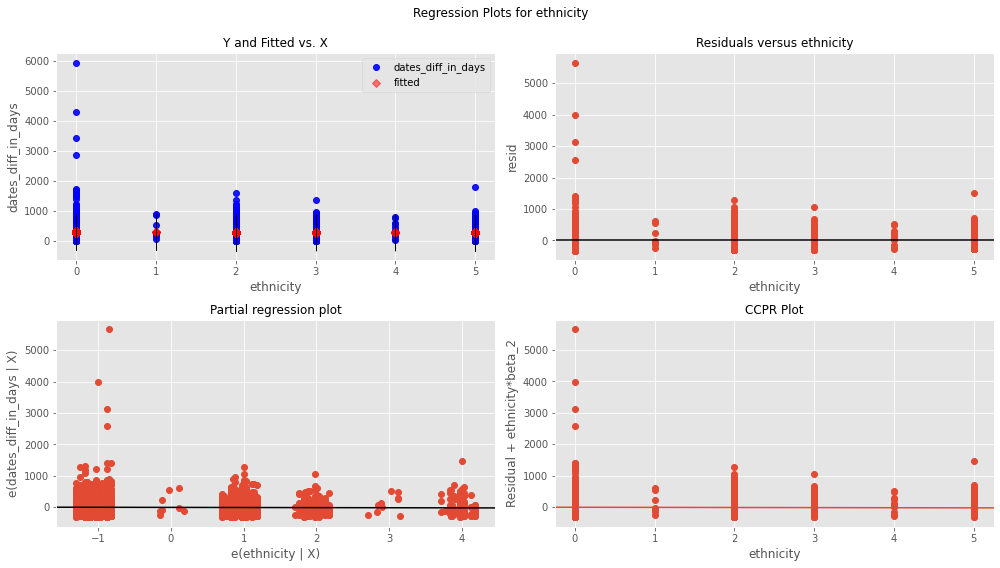

eval_env: 1


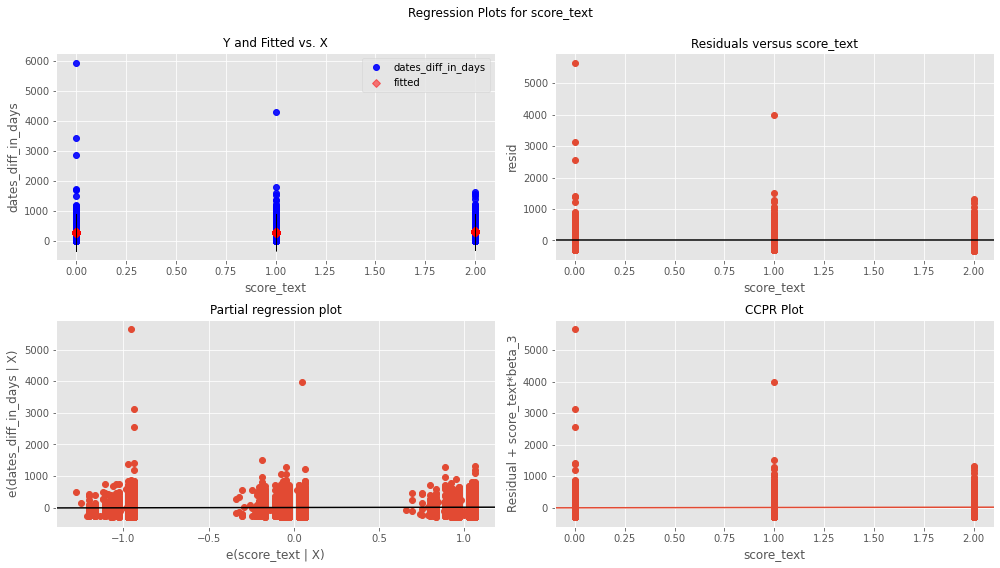

eval_env: 1


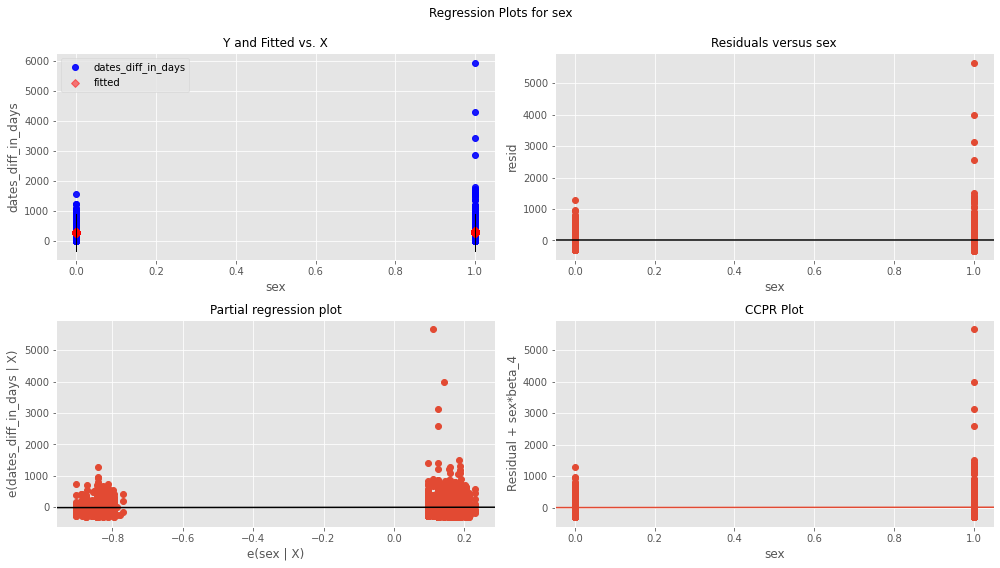

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dt_date_r= pd.read_csv('dt_date_r.csv')
dt_date_r['age_cat'] = dt_date_r['age_cat'].astype('category')
dt_date_r['ethnicity'] = dt_date_r['ethnicity'].astype('category')
dt_date_r['score_text'] = dt_date_r['score_text'].astype('category')
dt_date_r['sex'] = dt_date_r['sex'].astype('category')

number = preprocessing.LabelEncoder()
for attribute in dt_date_r.columns:
    if dt_date_r[attribute].dtype.name == "category":
        dt_date_r[attribute] = number.fit_transform(dt_date_r[attribute])

results = smf.ols('dates_diff_in_days ~ age_cat + ethnicity + score_text + sex',data=dt_date_r).fit()
attributes = [ 'age_cat', 'ethnicity', 'score_text', 'sex']
for attribute in attributes:
    fig= plt.figure(figsize=(14,8)) 
    sm.graphics.plot_regress_exog(results, attribute, fig=fig)
    plt.show()

## Regression Model
#### Variable to predict: y = ['dates_diff_in_days']
As sub-goal we worked on the dataset `dt_date_v`to predict if it is a violent recid (`is_recid`=1 and `is_violent_recid`=1) how many days pass from the first violent crime (attribute: `c_offense_date`) to the second (attribute: `vr_offense_date`).

In [63]:
dt_date_v = pd.read_csv('dt_date_v.csv', sep=',')
print(dt_date_v)

    age_cat  dates_diff_in_days         ethnicity   sex v_score_text
0     adult                 160  African-American  Male          Low
1     young                 736         Caucasian  Male       Medium
2     adult                 242         Caucasian  Male          Low
3     adult                 659  African-American  Male          Low
4     adult                 296  African-American  Male       Medium
..      ...                 ...               ...   ...          ...
723   young                 217  African-American  Male       Medium
724   adult                 252  African-American  Male          Low
725   adult                 926  African-American  Male       Medium
726  senior                 741  African-American  Male         High
727   adult                 337         Caucasian  Male          Low

[728 rows x 5 columns]


In [64]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [65]:
X = dt_date_v[['age_cat', 'ethnicity', 'v_score_text', 'sex']]
y = dt_date_v['dates_diff_in_days']

In [66]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age_cat_senior,age_cat_young,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other,v_score_text_Low,v_score_text_Medium,sex_Male
0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,1,1
2,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,1


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 10)
(182, 10)
(546,)
(182,)


In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#The intercept (often labeled the constant) is the expected mean value of Y when all X=0. 
#In a purely mathematical sense, this definition is correct

print(model.intercept_)

445.7015289297923


In [69]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_parameter

,coefficient
age_cat_senior,124.789211
age_cat_young,-8.889943
ethnicity_Asian,-42.569574
ethnicity_Caucasian,-75.149561
ethnicity_Hispanic,45.466648
ethnicity_Native American,364.672239
ethnicity_Other,-84.999001
v_score_text_Low,-32.905414
v_score_text_Medium,23.736487
sex_Male,-45.110255


c:\Users\giada\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dates_diff_in_days'>

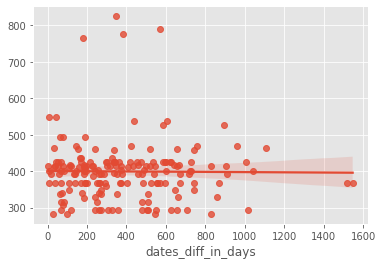

In [70]:
predictions = model.predict(X_test)
sn.regplot(y_test,predictions)

In this case the correlation seems to be linear, but the R-squared value is very low. So, the linear regression model does not fit these data.

#### OLS Regression Results

In [71]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     dates_diff_in_days   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.798
Date:                Thu, 23 Jun 2022   Prob (F-statistic):             0.0581
Time:                        10:54:13   Log-Likelihood:                -3935.6
No. Observations:                 546   AIC:                             7893.
Df Residuals:                     535   BIC:                             7941.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Plot the residuals for each attribute

eval_env: 1


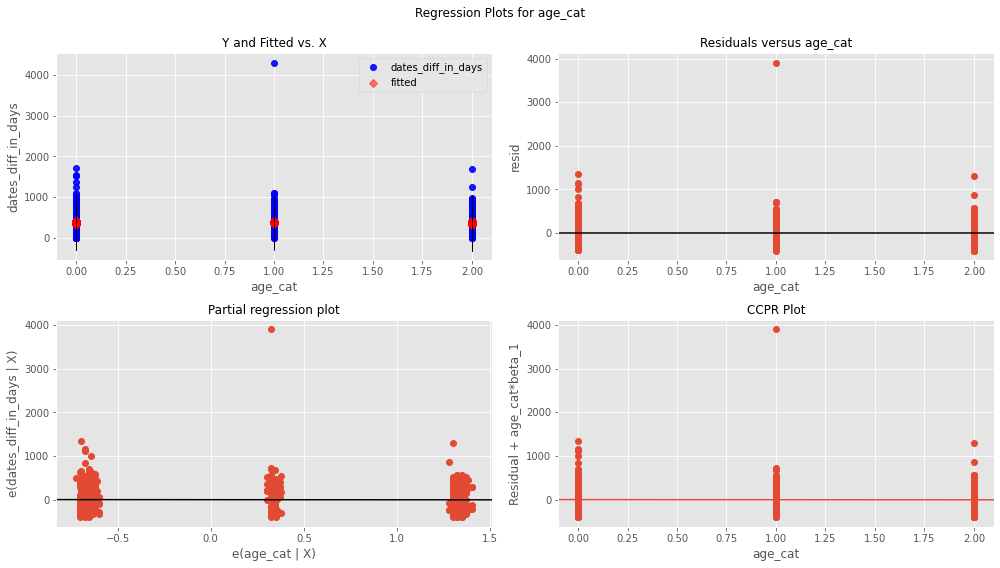

eval_env: 1


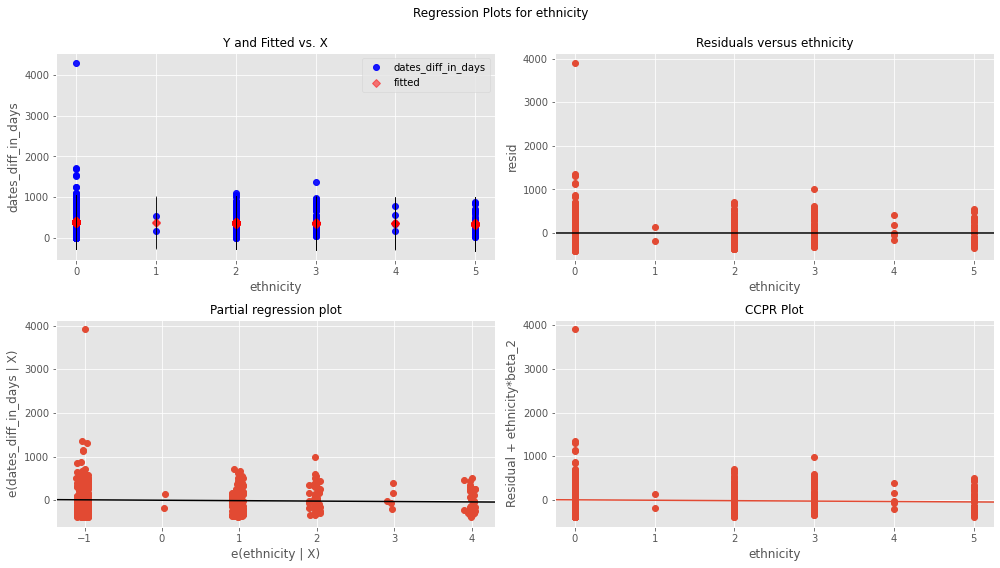

eval_env: 1


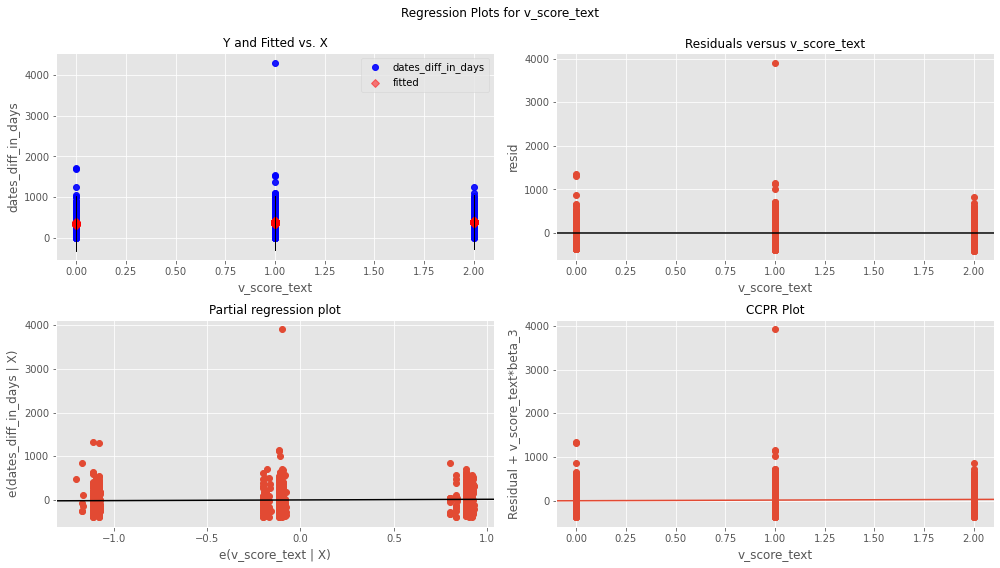

eval_env: 1


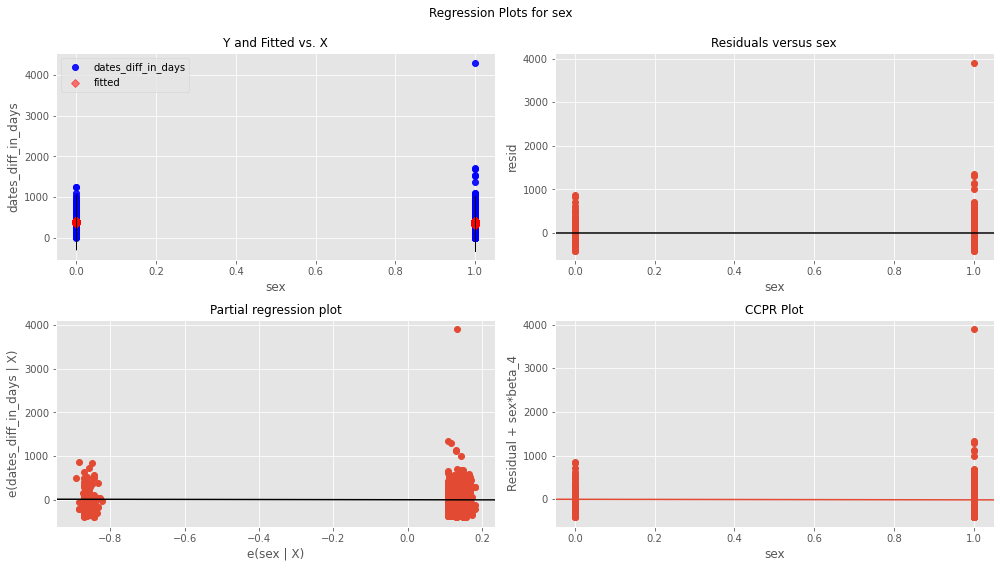

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dt_date_v= pd.read_csv('dt_date_v.csv')
dt_date_v['age_cat'] = dt_date_v['age_cat'].astype('category')
dt_date_v['ethnicity'] = dt_date_v['ethnicity'].astype('category')
dt_date_v['v_score_text'] = dt_date_v['v_score_text'].astype('category')
dt_date_v['sex'] = dt_date_v['sex'].astype('category')

number = preprocessing.LabelEncoder()
for attribute in dt_date_v.columns:
    if dt_date_v[attribute].dtype.name == "category":
        dt_date_v[attribute] = number.fit_transform(dt_date_v[attribute])

results = smf.ols('dates_diff_in_days ~ age_cat + ethnicity + v_score_text + sex',data=dt_date_v).fit()
attributes = [ 'age_cat', 'ethnicity', 'v_score_text', 'sex']
for attribute in attributes:
    fig= plt.figure(figsize=(14,8)) 
    sm.graphics.plot_regress_exog(results, attribute, fig=fig)
    plt.show()